<a href="https://colab.research.google.com/github/saisasi-choda/ML/blob/main/image_classification__MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, Sequential

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


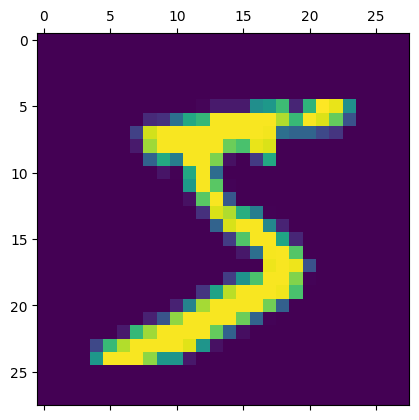

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [23]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train.shape

(60000, 28, 28)

In [24]:
from re import X
X_train_flatten = X_train.reshape(60000, 28*28)
X_test_flatten = X_test.reshape(10000, 28*28)

In [32]:
model = Sequential([
    layers.Dense(10,activation='sigmoid', input_shape=(784,))
    ])

In [33]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
model.fit(x=X_train_flatten, y=y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8218 - loss: 0.7087
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9130 - loss: 0.3118
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9211 - loss: 0.2816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9249 - loss: 0.2720
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9258 - loss: 0.2629


In [35]:
model.evaluate(x=X_test_flatten, y=y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9109 - loss: 0.3106


[0.2728281617164612, 0.9229000210762024]

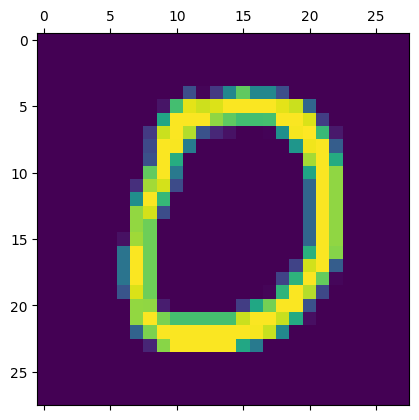

In [42]:
plt.matshow(X_test[10])

In [36]:
y_preds=model.predict(X_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [43]:
y_preds[10]

array([9.9927253e-01, 2.9257760e-07, 5.3159136e-01, 1.2627257e-01,
       1.4349188e-04, 8.0306137e-01, 3.7432410e-02, 2.4134306e-05,
       5.2513605e-01, 3.7518848e-04], dtype=float32)

In [44]:
y_preds[10].argmax()

0

In [46]:
y_preds_labels=[i.argmax() for i in y_preds]
y_preds_labels[:5]

[7, 2, 1, 0, 4]

In [53]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [56]:
#lets plot confusion matrix



Text(33.22222222222222, 0.5, 'Truth')

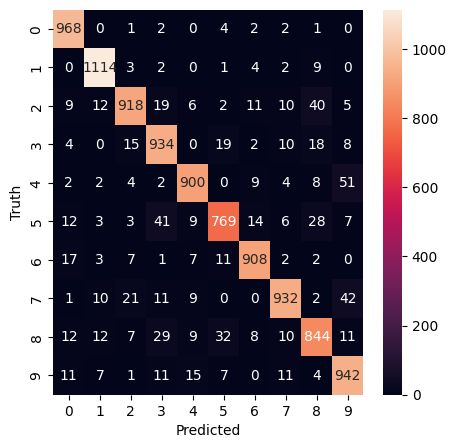

In [58]:
cm=tf.math.confusion_matrix(y_test, y_preds_labels)
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100,activation='relu'),
    layers.Dense(100,activation='sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
model.fit(x=X_train, y=y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8421 - loss: 0.6194
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9572 - loss: 0.1496
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9712 - loss: 0.0973
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9777 - loss: 0.0738
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9834 - loss: 0.0575


In [63]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.0917


[0.08060851693153381, 0.9760000109672546]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(33.22222222222222, 0.5, 'Truth')

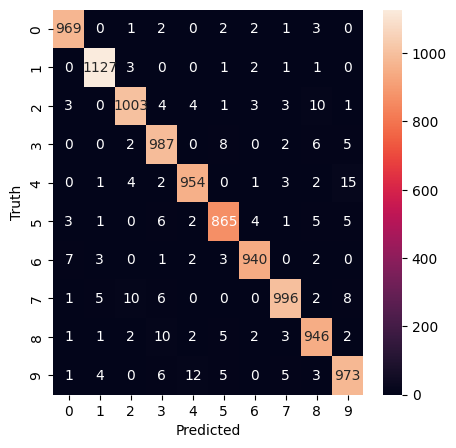

In [64]:
y_preds=model.predict(X_test)
y_preds_labels=[i.argmax() for i in y_preds]
cm=tf.math.confusion_matrix(y_test, y_preds_labels)
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          10,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,802 (1.01 MB)

 Trainable params: 88,600 (346.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 177,202 (692.20 KB)